<h1><center><font color='#DE2138'>Accidents_Analysis.ipynb</font></center></h1>


# Índice de contenidos

1. [Carga todos los csv en un único DataFrame](Accidents_Analysis.ipynb#carga)
2. [Eliminación de columnas referidas a coordenadas](Accidents_Analysis.ipynb#eliminacion-coordenadas)
3. [Reestructuración de la columna tipo de vehículo](Accidents_Analysis.ipynb#reestructuracion-vehiculos)
4. [Análisis de valores nulos](Accidents_Analysis.ipynb#valores-nulos)
5. [Reducción de categorías en la columna tipo accidente](Accidents_Analysis.ipynb#reduccion-tipo-accidente)
6. [Análisis de positivos en alcohol y drogas](Accidents_Analysis.ipynb#positivos-alcohol-drogas)
7. [Tipos de accidente más comunes según alcohol](Accidents_Analysis.ipynb#tipos-accidente-alcohol)
8. [Visualización: Accidentes por estado meteorológico](Accidents_Analysis.ipynb#visualizacion-meteorologia)
9. [Análisis de accidentes múltiples](Accidents_Analysis.ipynb#accidentes-multiples)
10. [Horas más peligrosas para circular en Madrid](Accidents_Analysis.ipynb#horas-peligrosas)

---

## <h2 id="carga"><center><font color='#1E90FF'>1. Carga todos los csv en un único DataFrame</font></center></h2>

Para iniciar el análisis, cargué los datasets correspondientes a los años **2019-2024** en un único DataFrame. Aunque en un futuro me gustaría explorar la posibilidad de normalizar datos de años previos, decidí enfocarme en este rango temporal por las diferencias en las columnas.

Utilicé un bucle compacto para leer y concatenar los archivos mediante la función `read_csv`. Posteriormente, con `shape` e `info`, comprobé el número de filas y columnas del DataFrame resultante, facilitando el control del proceso.

### ¿Cómo lo resolví?
En esta primera parte, mi objetivo fue unificar los datos de varios ficheros *.csv* en un único DataFrame para su posterior análisis. Para ello, seguí estos pasos básicos:

1. Definí la lista de archivos *.csv* en un array de Python.
2. Utilicé comprensión de listas para cargar cada archivo con `pd.read_csv()`.
3. Unifiqué toda la información mediante `pd.concat()`.
4. Verifiqué la estructura y tamaño del DataFrame con `df.shape` y `df.info()`.

### Características del código
- **Eficiencia y legibilidad:** El bucle de lectura con comprensión de listas facilita un código conciso.
- **Uso de `delimiter=";"`:** Asegura la correcta separación de columnas según el formato de los ficheros.
- **Control de índices duplicados:** Con `ignore_index=True`, garantizo una indexación coherente en el DataFrame final.


In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [2]:
todos_csv = ["2019_Accidentalidad.csv","2020_Accidentalidad.csv","2021_Accidentalidad.csv",
             "2022_Accidentalidad.csv","2023_Accidentalidad.csv","2024_Accidentalidad.csv",]

lectura_csv = [pd.read_csv(csv,delimiter = ";") for csv in todos_csv]
df = pd.concat(lectura_csv, ignore_index = True)

print(f"---El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas---\n")

df.info()



---El dataframe tiene 271250 filas y 19 columnas---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271250 entries, 0 to 271249
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        271250 non-null  object 
 1   fecha                 271250 non-null  object 
 2   hora                  271250 non-null  object 
 3   localizacion          271250 non-null  object 
 4   numero                271242 non-null  object 
 5   cod_distrito          271242 non-null  float64
 6   distrito              271242 non-null  object 
 7   tipo_accidente        271241 non-null  object 
 8   estado_meteorológico  241587 non-null  object 
 9   tipo_vehiculo         269912 non-null  object 
 10  tipo_persona          271247 non-null  object 
 11  rango_edad            271250 non-null  object 
 12  sexo                  271250 non-null  object 
 13  cod_lesividad         148686 non-null  float64
 14 

---

## <h2><center><font color='#1E90FF'>2. Eliminación de columnas referidas a coordenadas</font></center></h2>

El siguiente paso fue eliminar las columnas relacionadas con coordenadas *(coordenada_x_utm, coordenada_y_utm)*, ya que no aportaban valor al análisis propuesto. Para ello, usé la función `drop`, almacenando primero los nombres de las columnas en una lista para mayor claridad y manipulación.

Realicé comprobaciones constantes a lo largo de todo el ejercicio con `head` para verificar que los cambios se aplicaron correctamente.

### ¿Cómo lo resolví?
En esta etapa, identifiqué qué columnas eran irrelevantes para el análisis y procedí a su eliminación. De esta forma, mantuve el DataFrame lo más limpio posible.

### Características del código
- **Uso de listas y `drop()`:** Permite eliminar varias columnas al mismo tiempo.  
- **In-place vs. asignación:** Decidí emplear `inplace=True` para simplificar la eliminación y no reasignar a una nueva variable.

In [3]:
columnas_coordenadas = ["coordenada_x_utm","coordenada_y_utm"]
df.drop(columnas_coordenadas, axis = 1, inplace = True)

df.head(3)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,S,NaN


---

## <h2><center><font color='#1E90FF'>3. Reestructuración de la columna tipo de vehículo</font></center></h2>

En este punto, abordé la reducción de las categorías en la columna `"tipo_vehiculo"`. El objetivo fue agrupar subcategorías redundantes en **seis categorías principales**. Finalmente, decidí crear una nueva columna `"tipo_vehiculo_reducido"` para conservar la información original y evitar pérdidas de datos valiosos.

### ¿Cómo lo resolví?
Para lograrlo, primero listé las categorías originales mediante `unique()`. Posteriormente, redacté un diccionario de mapeo manual que agrupa distintas variaciones de vehículos en categorías más representativas. De esta manera, simplifiqué los análisis estadísticos.

### Características del código
- **Uso de `unique()` para explorar categorías:** Me ayudó a verificar la extensión y variedad de valores existentes.  
- **Creación de una nueva columna:** Mantener el dato original en “tipo_vehiculo” y colocar la versión resumida en “tipo_vehiculo_reducido”.  
- **Diccionario de mapeo manual:** Evité errores tipográficos y categorizaciones incorrectas al redactar cuidadosamente las claves y valores.

In [4]:
df.tipo_vehiculo.unique()

array(['Motocicleta > 125cc', 'Turismo', 'Furgoneta', 'Autobús',
       'Ciclomotor', 'Motocicleta hasta 125cc', 'Todo terreno',
       'Bicicleta', 'Camión rígido', 'Maquinaria de obras',
       'Tractocamión', nan, 'Cuadriciclo no ligero',
       'Vehículo articulado', 'Autobús articulado',
       'Otros vehículos con motor', 'Autocaravana', 'Patinete', 'Ciclo',
       'Cuadriciclo ligero', 'VMU eléctrico', 'Semiremolque',
       'Microbús <= 17 plazas', 'Sin especificar', 'Autobus EMT',
       'Remolque', 'Tranvía', 'Caravana', 'Camión de bomberos',
       'Otros vehículos sin motor', 'Bicicleta EPAC (pedaleo asistido)',
       'Moto de tres ruedas > 125cc', 'Tren/metro', 'Ambulancia SAMUR',
       'Moto de tres ruedas hasta 125cc',
       'Ciclomotor de dos ruedas L1e-B', 'Maquinaria agrícola',
       'Autobús articulado EMT', 'Ciclomotor de tres ruedas',
       'Ciclo de motor L1e-A', 'Patinete no eléctrico'], dtype=object)

In [5]:
diccionario_mapeo = {
    'Motocicleta > 125cc': 'Motocicleta',
    'Motocicleta hasta 125cc': 'Motocicleta',
    'Ciclomotor': 'Motocicleta',
    'Moto de tres ruedas > 125cc': 'Motocicleta',
    'Ciclomotor de dos ruedas L1e-B': 'Motocicleta',
    'Moto de tres ruedas hasta 125cc': 'Motocicleta',
    'Ciclo de motor L1e-A': 'Motocicleta',

    'Bicicleta': 'Bicicleta',
    'Bicicleta EPAC (pedaleo asistido)': 'Bicicleta',
    'Ciclo': 'Bicicleta',
    'Patinete': 'Bicicleta',
    'Patinete no eléctrico': 'Bicicleta',

    'Camión rígido': 'Camión',
    'Tractocamión': 'Camión',
    'Vehículo articulado': 'Camión',
    'Maquinaria de obras': 'Camión',
    'Maquinaria agrícola': 'Camión',
    'Remolque': 'Camión',
    'Semiremolque': 'Camión',

    'Autobús': 'Autobús',
    'Autobús articulado': 'Autobús',
    'Autobús EMT': 'Autobús',
    'Autobús articulado EMT': 'Autobús',
    'Microbús <= 17 plazas': 'Autobús',
    'Tranvía': 'Autobús',
    'Tren/metro': 'Autobús',

    'Turismo': 'Turismo',
    'Furgoneta': 'Furgoneta',
    'Todo terreno': 'Turismo',
    'Autocaravana': 'Turismo',
    'Caravana': 'Turismo',

    'Cuadriciclo ligero': 'Otro vehículo',
    'Cuadriciclo no ligero': 'Otro vehículo',
    'VMU eléctrico': 'Otro vehículo',
    'Otros vehículos con motor': 'Otro vehículo',
    'Otros vehículos sin motor': 'Otro vehículo',
    'Ambulancia SAMUR': 'Otro vehículo',
    'Camión de bomberos': 'Otro vehículo',
    'Sin especificar': 'Otro vehículo',
    'nan': 'Otro vehículo'
}


df.insert(df.columns.get_loc("tipo_vehiculo") + 1, "tipo_vehiculo_reducido", df["tipo_vehiculo"].map(diccionario_mapeo))


frecuencia_tipos = df["tipo_vehiculo_reducido"].value_counts()
porcentajes_tipos = (frecuencia_tipos / len(df) * 100).round(2).astype(str) + "%"


print("Frecuencia de las nuevas categorías:")
print(frecuencia_tipos)

print("\nPorcentaje de las nuevas categorías:")
print(porcentajes_tipos)


Frecuencia de las nuevas categorías:
tipo_vehiculo_reducido
Turismo          191607
Motocicleta       33607
Furgoneta         17558
Camión             8732
Autobús            7720
Bicicleta          5724
Otro vehículo      4729
Name: count, dtype: int64

Porcentaje de las nuevas categorías:
tipo_vehiculo_reducido
Turismo          70.64%
Motocicleta      12.39%
Furgoneta         6.47%
Camión            3.22%
Autobús           2.85%
Bicicleta         2.11%
Otro vehículo     1.74%
Name: count, dtype: object


In [6]:
df.head(3)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_vehiculo_reducido,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Motocicleta,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,NaN
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,S,NaN


#### Mención especial a mi intento fallido de automatizar el mapeo
Me parecía interesante dejar reflejado que intenté generar de forma interactiva el diccionario de mapeo definiendo una función, pero resultó más costoso en tiempo y más propenso a errores (ya que cada vez que me equivocaba mientras se ejecutaba la función tenía que volver a reiniciarla). Por eso, concluí que un **enfoque manual** era más adecuado en este caso.

In [7]:
def generar_diccionario_mapeo(columna):

    """
    Genera un diccionario de mapeo para reducir categorías en una columna dada.

    Parámetros:
    columna (pd.Series): Columna del DataFrame que contiene las categorías a reducir.

    Retorna:
    dict: Diccionario con las categorías originales como claves y las categorías reducidas como valores.
    """
    
    categorias_unicas = columna.unique()
    print("Primero, hay que definir las categorías en las que se va a reducir esta columna:")
    categorias = []
    numero_categorias = int(input("¿Cuántas categorías principales deseas definir? "))
    for i in range(numero_categorias):
        cat = input(f"Introduce la categoría principal {i + 1}: ")
        categorias.append(cat)

    mapeo = {}
    print("\nAhora, vamos a asignar las categorías:")
    for categoria in categorias_unicas:
        print(f"\nTienes que reestructurar la categoría: {categoria}")
        print("Recuerda, debes escoger entre estas:")
        for i, principal in enumerate(categorias, start=1):
            print(f"{i} = {principal}")
        while True:
            try:
                opcion = int(input(f"¿A qué categoría se asignará '{categoria}'? (Teclea el número): "))
                if 1 <= opcion <= len(categorias):
                    mapeo[categoria] = categorias[opcion - 1]
                    break
                else:
                    print("Opción fuera de rango. Inténtalo de nuevo.")
            except ValueError:
                print("Entrada no válida. Teclea un número.")

    return mapeo


In [8]:
# generar_diccionario_mapeo(df.tipo_vehiculo)

---

## <h2><center><font color='#1E90FF'>4. Análisis de valores nulos</font></center></h2>

En esta sección, inspeccioné los valores nulos y los traté según era necesario para cada columna:

- **positiva_droga:** Rellenar con `0`.  
- **positiva_alcohol:** Rellenar con `"N"`.  
- **lesividad:** Rellenar con `"Sin atención sanitaria"` y `0` en el código.  
- **estado_meteorológico:** Usar la categoría `"Se desconoce"`.  
- **Otros nulos:** Eliminar las filas correspondientes.

### ¿Cómo lo resolví?
En primer lugar, utilicé `fillna()` para cada columna específica con la estrategia de sustitución indicada. Para aquellos nulos no contemplados en la instrucción, opté por `dropna()`. Finalmente, revisé el tamaño final del DataFrame con `df.shape` y validé la integridad de la información.

### Características del código
- **Sustituciones directas con `fillna()`:** Permite asignar valores por defecto.  
- **Evitando problemas con `inplace=True`:** Preferí re-asignar columnas directamente, manteniendo un flujo más seguro para versiones futuras de pandas.  
- **Control final del tamaño del DataFrame:** Con `df.info()` y `df.shape`, corroboro que no haya inconsistencias.


In [9]:
# Para la columna positivo droga, rellena los nulos con 0.
df["positiva_droga"] = df["positiva_droga"].fillna(0)

# Para la columna positivo alcohol, rellena los nulos con “N”
df["positiva_alcohol"] = df["positiva_alcohol"].fillna("N")

# Para las columnas referidas a lesividad, rellenaremos los datos faltantes con “Sin atención sanitaria” (en código lesividad, pondremos valor 0)
df["lesividad"] = df["lesividad"].fillna("Sin atención sanitaria")
df["cod_lesividad"] = df["cod_lesividad"].fillna(0)

# Para el estado meteorológico emplearemos la categoría ya existente “Se desconoce”
df["estado_meteorológico"] = df["estado_meteorológico"].fillna("Se desconoce")

# El resto de valores nulos, los eliminaremos del conjunto de datos.
df.dropna(inplace = True)

# ¿Cuántas filas y columnas tienes ahora?
print(f"Ahora tengo {df.shape[0]} filas y {df.shape[1]} columnas")

Ahora tengo 269657 filas y 18 columnas


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269657 entries, 0 to 271249
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_expediente          269657 non-null  object 
 1   fecha                   269657 non-null  object 
 2   hora                    269657 non-null  object 
 3   localizacion            269657 non-null  object 
 4   numero                  269657 non-null  object 
 5   cod_distrito            269657 non-null  float64
 6   distrito                269657 non-null  object 
 7   tipo_accidente          269657 non-null  object 
 8   estado_meteorológico    269657 non-null  object 
 9   tipo_vehiculo           269657 non-null  object 
 10  tipo_vehiculo_reducido  269657 non-null  object 
 11  tipo_persona            269657 non-null  object 
 12  rango_edad              269657 non-null  object 
 13  sexo                    269657 non-null  object 
 14  cod_lesividad           2

---

## <h2><center><font color='#1E90FF'>5. Reducción de categorías en la columna tipo accidente</font></center></h2>

Creé una nueva categoría llamada **"Otro accidente"** para agrupar las categorías con una frecuencia inferior al **10%**. Utilicé `unique` para listar todas las categorías existentes y evalué sus porcentajes antes y después de la reestructuración. Esto ayudó a simplificar el análisis sin perder información relevante.

### ¿Cómo lo resolví?
Primero calculé la frecuencia de cada categoría con `value_counts()`. Luego, transformé los porcentajes para identificar cuáles quedaban por debajo del 10%. Finalmente, reemplacé dichas categorías por “Otro accidente” y creé la columna `"tipo_accidente_reducido"`.

### Características del código
- **Filtros en base a porcentajes:** Convierto la frecuencia en porcentaje y comparo con el umbral deseado.  
- **Uso de `replace()`:** Reemplazo eficiente de valores en la columna original.  
- **Comparación antes y después:** Garantiza la verificación del impacto en la distribución de valores.


In [11]:
df["tipo_accidente"].unique()

array(['Colisión lateral', 'Alcance', 'Choque contra obstáculo fijo',
       'Colisión fronto-lateral', 'Caída', 'Colisión frontal', 'Otro',
       'Atropello a persona', 'Colisión múltiple', 'Vuelco',
       'Atropello a animal', 'Solo salida de la vía', 'Despeñamiento'],
      dtype=object)

In [12]:
frecuencia_tipos_accidente = df["tipo_accidente"].value_counts()
porcentajes_tipos_accidente = (frecuencia_tipos_accidente / len(df) * 100)

print("\nPorcentaje de las nuevas categorías:")
print(porcentajes_tipos_accidente)


Porcentaje de las nuevas categorías:
tipo_accidente
Colisión fronto-lateral         25.389662
Alcance                         23.655236
Colisión lateral                14.776549
Choque contra obstáculo fijo    12.043819
Colisión múltiple                6.651413
Atropello a persona              6.479342
Caída                            5.888221
Colisión frontal                 2.421966
Otro                             1.704017
Solo salida de la vía            0.423872
Vuelco                           0.380113
Atropello a animal               0.179116
Despeñamiento                    0.006675
Name: count, dtype: float64


In [13]:
accidentes_reemplazables = porcentajes_tipos_accidente[porcentajes_tipos_accidente < 10].index

df.insert(df.columns.get_loc("tipo_accidente") + 1, "tipo_accidente_reducido", df["tipo_accidente"].replace(accidentes_reemplazables, "Otro accidente"))

In [14]:
frecuencia_tipos_accidente = df["tipo_accidente_reducido"].value_counts()
porcentajes_tipos_accidente = (frecuencia_tipos_accidente / len(df) * 100)

print("\nPorcentaje de las nuevas categorías:")
print(porcentajes_tipos_accidente)


Porcentaje de las nuevas categorías:
tipo_accidente_reducido
Colisión fronto-lateral         25.389662
Otro accidente                  24.134734
Alcance                         23.655236
Colisión lateral                14.776549
Choque contra obstáculo fijo    12.043819
Name: count, dtype: float64


---

## <h2><center><font color='#1E90FF'>6. Análisis de positivos en alcohol y drogas</font></center></h2>

En esta sección, investigué si había accidentes en los que los implicados dieron positivo tanto en alcohol como en drogas. Utilicé `value_counts()` y algunas condiciones lógicas para identificar el número de personas implicadas y el número de expedientes únicos relacionados.

### ¿Cómo lo resolví?
1. Revisé la distribución de valores en `positiva_alcohol` y `positiva_droga`.  
2. Apliqué un filtro conjunto para encontrar registros con `"positiva_alcohol" == "S"` y `"positiva_droga" == 1"`.  
3. Contabilicé tanto el número de filas afectadas como los expedientes únicos con `unique()`.

### Características del código
- **Uso de filtros booleanos:** Permite aislar de forma eficiente las filas correspondientes.  
- **Identificación de expedientes únicos:** Proporciona la magnitud real del problema, evitando contar repetidamente el mismo incidente.


In [15]:
print(f"{df['positiva_alcohol'].value_counts()}\n")

print(df["positiva_droga"].value_counts())


positiva_alcohol
N    261765
S      7892
Name: count, dtype: int64

positiva_droga
0.0    268767
1.0       890
Name: count, dtype: int64


In [16]:
ambos_positivos = df[(df["positiva_alcohol"] == "S") & (df["positiva_droga"] == 1)]

print(f"Hay un total de {ambos_positivos.shape[0]} personas implicadas")
print(f"Y hay un total de {len(ambos_positivos['num_expediente'].unique())} expedientes únicos")


Hay un total de 187 personas implicadas
Y hay un total de 183 expedientes únicos


---

## <h2><center><font color='#1E90FF'>7. Tipos de accidente más comunes según alcohol</font></center></h2>

Analicé los tipos de accidentes para implicados que dieron **positivo en alcohol** y para aquellos que no. Observé diferencias en los patrones: en los positivos se destacó el **choque contra obstáculo fijo**, mientras que en los negativos predominó la **colisión por alcance**.

### ¿Cómo lo resolví?
- Separé el DataFrame en dos subconjuntos (`positivos_alcohol` y `negativos_alcohol`).  
- Obtuve la categoría más frecuente en cada subconjunto con `value_counts().idxmax()`.  
- Comparé los resultados para encontrar posibles explicaciones (por ejemplo, pérdida de control o condiciones de tráfico).

### Características del código
- **Segmentación de datos según condiciones:** Facilita la comparación directa entre grupos de interés.  
- **Búsqueda del tipo de accidente más común:** Uso de `value_counts()` y `idxmax()` para identificar rápidamente la moda en cada grupo.  
- **Análisis interpretativo:** Relacionar los hallazgos con posibles causas en la vida real.


In [17]:
# ¿Cuál es el tipo de accidente más común para aquellos implicados que habían dado positivo en alcohol? 
positivos_alcohol = df[df["positiva_alcohol"] == "S"]
mas_comun_positivo = positivos_alcohol["tipo_accidente"].value_counts().idxmax()
frecuencia_positivo = positivos_alcohol["tipo_accidente"].value_counts().max()

# ¿Y para aquellos implicados que no dieron positivo en la prueba de alcohol? 
negativos_alcohol = df[df["positiva_alcohol"] == "N"]
mas_comun_negativo = negativos_alcohol["tipo_accidente"].value_counts().idxmax()
frecuencia_negativo = negativos_alcohol["tipo_accidente"].value_counts().max()

# ¿Qué diferencias observas?
print(f"Para quiénes habián dado positivo en alcohol:")
print(f" - Su tipo de accidente más común fue: {mas_comun_positivo}")
print(f" - Un total de: {frecuencia_positivo} veces\n")

print(f"Para quiénes habián dado negativo en alcohol:")
print(f" - Su tipo de accidente más común fue: {mas_comun_negativo}")
print(f" - Un total de: {frecuencia_negativo} veces")


Para quiénes habián dado positivo en alcohol:
 - Su tipo de accidente más común fue: Choque contra obstáculo fijo
 - Un total de: 3044 veces

Para quiénes habián dado negativo en alcohol:
 - Su tipo de accidente más común fue: Colisión fronto-lateral
 - Un total de: 67369 veces


## Observaciones sobre los tipos de accidentes

### Positivos en alcohol:
En los casos donde los implicados dieron **positivo en alcohol**, el tipo de accidente más común fue el **choque contra obstáculo fijo**, con un total de **3.002 casos**. Este patrón podría estar relacionado con la pérdida de control del vehículo o una disminución en la capacidad de reacción causada por el consumo de alcohol.

### Negativos en alcohol:
Para los implicados que dieron **negativo en alcohol**, el accidente más frecuente fue la **colisión fronto-lateral**, con **66.131 casos**. Este tipo de accidente es típico en condiciones de tráfico habituales, como en intersecciones o situaciones de maniobras imprevistas.


---

## <h2><center><font color='#1E90FF'>8. Visualización: Accidentes por estado meteorológico</font></center></h2>

Graficé el número de accidentes por tipo de vehículo y estado meteorológico utilizando subgráficas comparativas. Este enfoque permitió visualizar patrones de forma clara y efectiva.

### ¿Cómo lo resolví?
- Agrupé los datos con `groupby(['tipo_vehiculo_reducido', 'estado_meteorológico'])`.  
- Calculé el conteo de accidentes y su porcentaje sobre cada categoría de vehículo.  
- Empleé **Plotly Express** (`px.bar`) para obtener un gráfico de barras apilado horizontal, enfatizando las diferencias en cada condición meteorológica.

### Características del código
- **Agrupación múltiple:** Sumariza los accidentes por más de un campo (vehículo y clima).  
- **Uso de `transform()`:** Calculo porcentajes en lugar de valores absolutos, permitiendo comparaciones más intuitivas.  
- **Gráfico interactivo:** *Plotly* facilita la exploración dinámica de la visualización.


In [18]:
df.head(3)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,tipo_accidente_reducido,estado_meteorológico,tipo_vehiculo,tipo_vehiculo_reducido,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Colisión lateral,Despejado,Motocicleta > 125cc,Motocicleta,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Colisión lateral,Despejado,Turismo,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,Alcance,Se desconoce,Furgoneta,Furgoneta,Conductor,De 40 a 44 años,Hombre,0.0,Sin atención sanitaria,S,0.0


In [19]:
# Calcular el conteo total de accidentes por tipo de vehículo y estado meteorológico
df_count = df.groupby(['tipo_vehiculo_reducido', 'estado_meteorológico']).size().reset_index(name='Conteo')

# Calcular el porcentaje para cada combinación, asegurando la alineación del índice
df_count['Porcentaje'] = df_count.groupby('tipo_vehiculo_reducido')['Conteo'].transform(lambda x: 100 * x / x.sum())


In [20]:
import plotly.express as px

df_count = df_count.reset_index()

fig = px.bar(
    df_count, 
    x='Porcentaje', 
    y='tipo_vehiculo_reducido', 
    color='estado_meteorológico', 
    orientation='h', 
    title='Accidentes por Tipo de Vehículo y Estado Meteorológico',
    color_discrete_sequence=px.colors.sequential.Sunset
)

fig.update_layout(
    xaxis_title='Porcentaje de Accidentes (%)',
    yaxis_title='Tipo de Vehículo',
    font=dict(size=14),
    plot_bgcolor='white',
    legend_title='Estado Meteorológico'
)

fig.show()


---

## <h2><center><font color='#1E90FF'>9. Análisis de accidentes múltiples</font></center></h2>

Al agrupar por `"num_expediente"` para identificar accidentes con cinco o más tipos de vehículos, el resultado siempre era cero. Tras revisar el código, descubrí que solo existían seis categorías de vehículos a gran escala, lo que no garantizaba múltiples tipos de vehículos en un mismo accidente.

### ¿Cómo lo resolví?
- Ordené agrupar por `num_expediente` y comprobé la diversidad en `tipo_vehiculo_reducido`.  
- Apliqué un filtro para retener solo aquellos expedientes con 5 o más tipos de vehículos (`.nunique() >= 5`).  
- Confirmé que no había expedientes que cumplieran el criterio.

### Características del código
- **Uso de `groupby` y `filter()`:** Permite aislar subconjuntos según la cantidad de valores únicos de una columna.  
- **Análisis de la diversidad dentro de un accidente:** Indica la complejidad o heterogeneidad de los vehículos involucrados.  
- **Lección aprendida:** La reducción de categorías puede simplificar en exceso el análisis si se sustituye la columna original.


In [21]:
df.head(2)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,tipo_accidente_reducido,estado_meteorológico,tipo_vehiculo,tipo_vehiculo_reducido,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Colisión lateral,Despejado,Motocicleta > 125cc,Motocicleta,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Colisión lateral,Despejado,Turismo,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,N,0.0


In [22]:
agrupado = df.groupby('num_expediente').filter(lambda x: x['tipo_vehiculo_reducido'].nunique() >= 5)

num_expedientes = agrupado['num_expediente'].nunique()
print(f"Cantidad de números de expediente con 5 o más tipos de vehículos: {num_expedientes}")

implicados_por_expediente = agrupado.groupby('num_expediente').size()
print("\nCantidad de implicados en cada expediente:")
print(implicados_por_expediente)


tipos_vehiculos_por_expediente = agrupado.groupby('num_expediente')['tipo_vehiculo_reducido'].unique()
print("\nTipos de vehículos diferentes en cada expediente:")
print(tipos_vehiculos_por_expediente)


Cantidad de números de expediente con 5 o más tipos de vehículos: 1

Cantidad de implicados en cada expediente:
num_expediente
2022S022123    10
dtype: int64

Tipos de vehículos diferentes en cada expediente:
num_expediente
2022S022123    [Camión, Furgoneta, Motocicleta, Otro vehículo...
Name: tipo_vehiculo_reducido, dtype: object


---
## <h2><center><font color='#1E90FF'>10. Horas más peligrosas para circular en Madrid</font></center></h2>

Finalmente, analicé las horas con mayor incidencia de accidentes. Utilicé gráficos de barras y mapas de calor, con colores inspirados en un semáforo para representar la gravedad. Como me quedé con las ganas de implementar un calendario más detallado, hice una búsqueda en internet y encontré la interesante librería `calplot` aquí: https://python-charts.com/es/evolucion/calendario-matplotlib/#google_vignette

### ¿Cómo lo resolví?
1. Extraje la hora del día a partir de la columna `"hora"` con `pd.to_datetime().dt.hour`.  
2. Contabilicé la frecuencia de accidentes por cada hora y ordené los resultados.  
3. Generé un *heatmap* con **Seaborn** para visualizar la relación entre días de la semana y horas del día.  
4. Usé la librería `calplot` para representar el recuento diario en un calendario, ofreciendo un panorama a largo plazo.

### Características del código
- **Transformación temporal con `dt.hour`:** Permite categorizar los accidentes según la franja horaria.  
- **Gráficos de barras con *Plotly*:** Facilidad de representación y personalización cromática.  
- **Mapa de calor (*heatmap*):** Resalta picos de siniestralidad en determinadas combinaciones día-hora.  
- **Calplot:** Crea un calendario para observar tendencias generales a lo largo de los días donde es reseñable la tendencia todos los años en agosto y durante los meses de confinamiento.

In [23]:
df["hora"].head(15)

0     9:10:00
1     9:10:00
2     3:45:00
3     3:45:00
4     3:45:00
5     3:45:00
6     3:45:00
7     3:45:00
8     3:50:00
9     3:50:00
10    3:50:00
11    3:50:00
12    4:00:00
13    4:00:00
14    4:00:00
Name: hora, dtype: object

In [24]:
df.insert(df.columns.get_loc("hora") + 1, "hora_reducida", pd.to_datetime(df["hora"], format="%H:%M:%S").dt.hour)

In [25]:
accidentes_por_hora = df['hora_reducida'].value_counts().reset_index()
accidentes_por_hora.columns = ['hora', 'n_accidentes']
accidentes_por_hora = accidentes_por_hora.sort_values('hora')

fig = px.bar(accidentes_por_hora, x='hora', y='n_accidentes', 
             color='n_accidentes', 
             color_continuous_scale='RdYlGn_r', 
             title='Horas más peligrosas para circular en Madrid')

fig.update_layout(
    xaxis_title='Hora del Día',
    yaxis_title='Número de Accidentes',
    font=dict(size=14),
    plot_bgcolor='white',
    coloraxis_colorbar=dict(title='Accidentes')
)
fig.show()


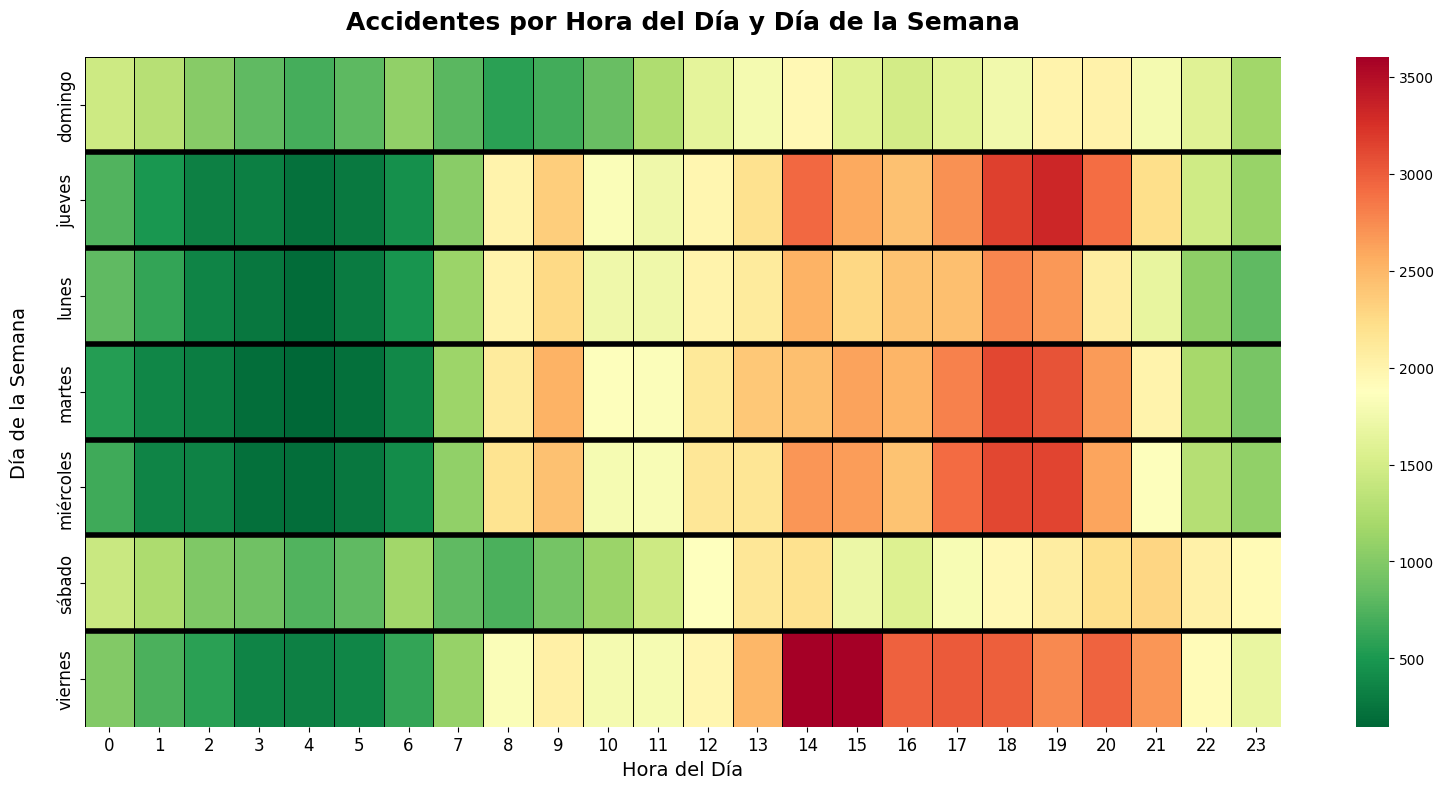

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

df['día_semana'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').dt.day_name()

mapeo_dias = {
    'Monday': 'lunes', 'Tuesday': 'martes', 'Wednesday': 'miércoles',
    'Thursday': 'jueves', 'Friday': 'viernes', 'Saturday': 'sábado', 'Sunday': 'domingo'
}
df['día_semana'] = df['día_semana'].map(mapeo_dias)

accidentes_heatmap = df.groupby(['día_semana', 'hora_reducida']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
ax = sns.heatmap(accidentes_heatmap, cmap="RdYlGn_r", annot=False, linewidths=0.5, linecolor='black')


for y in range(1, len(accidentes_heatmap.index)):
    ax.hlines(y, *ax.get_xlim(), colors='black', linewidth=4)


plt.title('Accidentes por Hora del Día y Día de la Semana', fontsize=18, weight='bold', pad=20)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Día de la Semana', fontsize=14, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


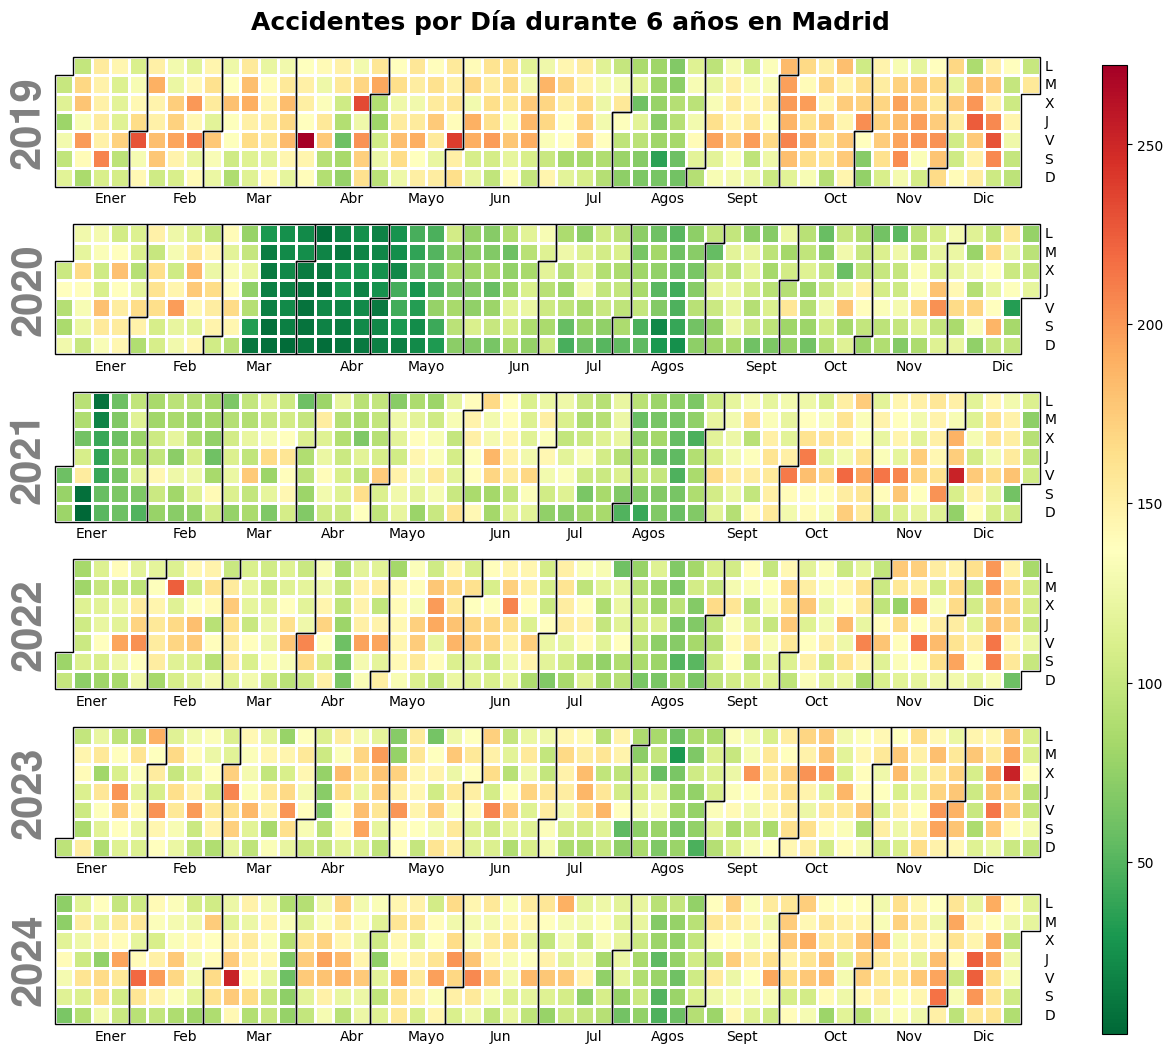

In [27]:
import calplot

df['fecha_hora'] = pd.to_datetime(df['fecha'] + ' ' + df['hora'], format='%d/%m/%Y %H:%M:%S')

accidentes_por_dia = df['fecha_hora'].dt.floor('d').value_counts()

accidentes_por_dia = accidentes_por_dia.sort_index()

calplot.calplot(accidentes_por_dia, cmap='RdYlGn_r', edgecolor = 'black', daylabels = ['L', 'M', 'X', 
                             'J', 'V', 'S', 'D'], suptitle='Accidentes por Día durante 6 años en Madrid', suptitle_kws={'fontsize': 18, "weight" : 'bold'},
                             monthlabels = ['Ener', 'Feb', 'Mar', 
                               'Abr', 'Mayo', 'Jun',
                               'Jul', 'Agos', 'Sept',
                               'Oct', 'Nov', 'Dic'])

plt.show()

In [28]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'hora_reducida', 'localizacion',
       'numero', 'cod_distrito', 'distrito', 'tipo_accidente',
       'tipo_accidente_reducido', 'estado_meteorológico', 'tipo_vehiculo',
       'tipo_vehiculo_reducido', 'tipo_persona', 'rango_edad', 'sexo',
       'cod_lesividad', 'lesividad', 'positiva_alcohol', 'positiva_droga',
       'día_semana', 'fecha_hora'],
      dtype='object')